IMPORT LIBRARIES

In [10]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

# display total data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

LOAD AND REVIEW DATA

In [2]:
app = pd.read_csv(r'C:\Users\lenovo\Downloads\application_data.csv')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
prev = pd.read_csv(r'C:\Users\lenovo\Downloads\previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dataframes shape and sizes of application data
app.shape


(307511, 122)

In [5]:
# Dataframes shape and sizes of previous_application data
prev.shape

(1670214, 37)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


CLEANING THE DATA

1. Missing Values in application_data


In [8]:
#find null value with percentage
round(100*app.isnull().sum()/len(app), 2)


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [31]:
null_app = pd.DataFrame((app.isnull().sum())*100/len(app)).reset_index()
null_app

,index,0
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


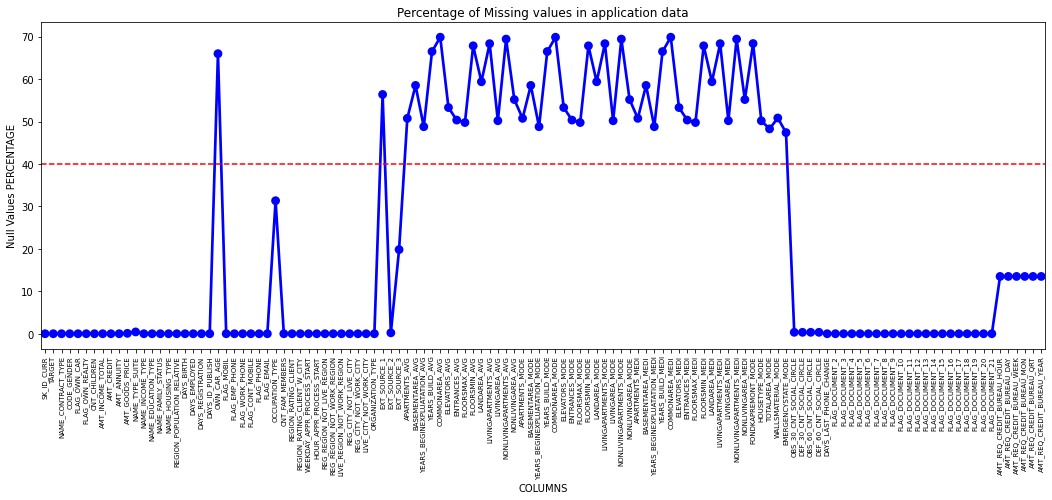

In [40]:
# more than or equal to 40% empty rows columns in application_data
null_app =((app.isnull().sum())*100/len(app)).reset_index()  #reset_index used for show index position 

null_app.columns = ['Column Name', 'Null Values Percentage']

# data.columns= to show all columns and column name , null value percentage are inputs

fig = plt.figure(figsize=(18,6))

ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_app,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [41]:
# more than or equal to 40% empty rows columns in application_data
null_40_app = null_app[null_app["Null Values Percentage"]>=40]
null_40_app

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [42]:
# Number of columns with more than or equal to 40% in application_data
len(null_40_app)

49

 2. Missing Values in previous_application


In [43]:
#find null value with percentage
round(100*prev.isnull().sum()/len(prev), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

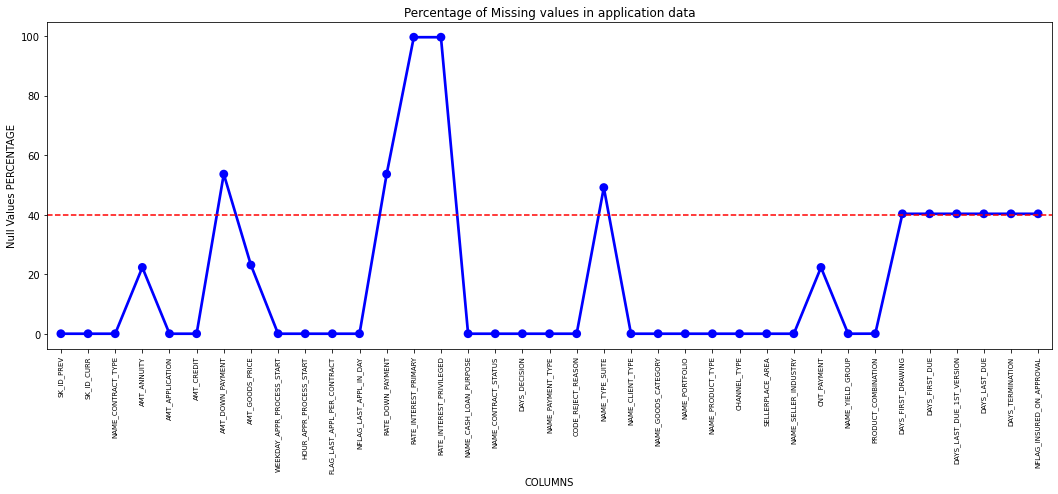

In [44]:
# more than or equal to 40% empty rows columns in previous_data
null_prev = pd.DataFrame((prev.isnull().sum())*100/len(prev)).reset_index()
null_prev.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_prev,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [45]:
# more than or equal to 40% empty rows columns in prev_application

null_40_prev = null_prev[null_prev["Null Values Percentage"]>=40]
null_40_prev

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [46]:
# Number of columns with more than or equal to 40% in prev_application
len(null_40_prev)

11

3. Analyze and Remove Unnecessary Columns in application_data

#we can chake how data columns are are correleted with target columns, if it is not correleted with each other we can drop unnecessary columns.

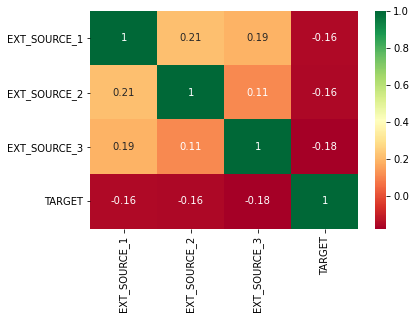

In [47]:
# check correlation between EXT_SOURCE_X columns and TARGET column
ext_source = app[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
ext_source_corr = ext_source.corr()
ax = sns.heatmap(ext_source_corr,
            xticklabels=ext_source_corr.columns,
            yticklabels=ext_source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

Based on the heatmap, we can see that there is almost no correlation between EXT_SOURCE_X columns and target column, so we will drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values and (there is no correlation with TARGET Variable).

In [48]:
# create a list of columns that needs to be dropped
# EXT_SOURCE_1 column is already included in null_40_appl
remove_col_app = null_40_app["Column Name"].tolist()+ ['EXT_SOURCE_3'] 
remove_col_app

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [49]:
len(remove_col_app)

50

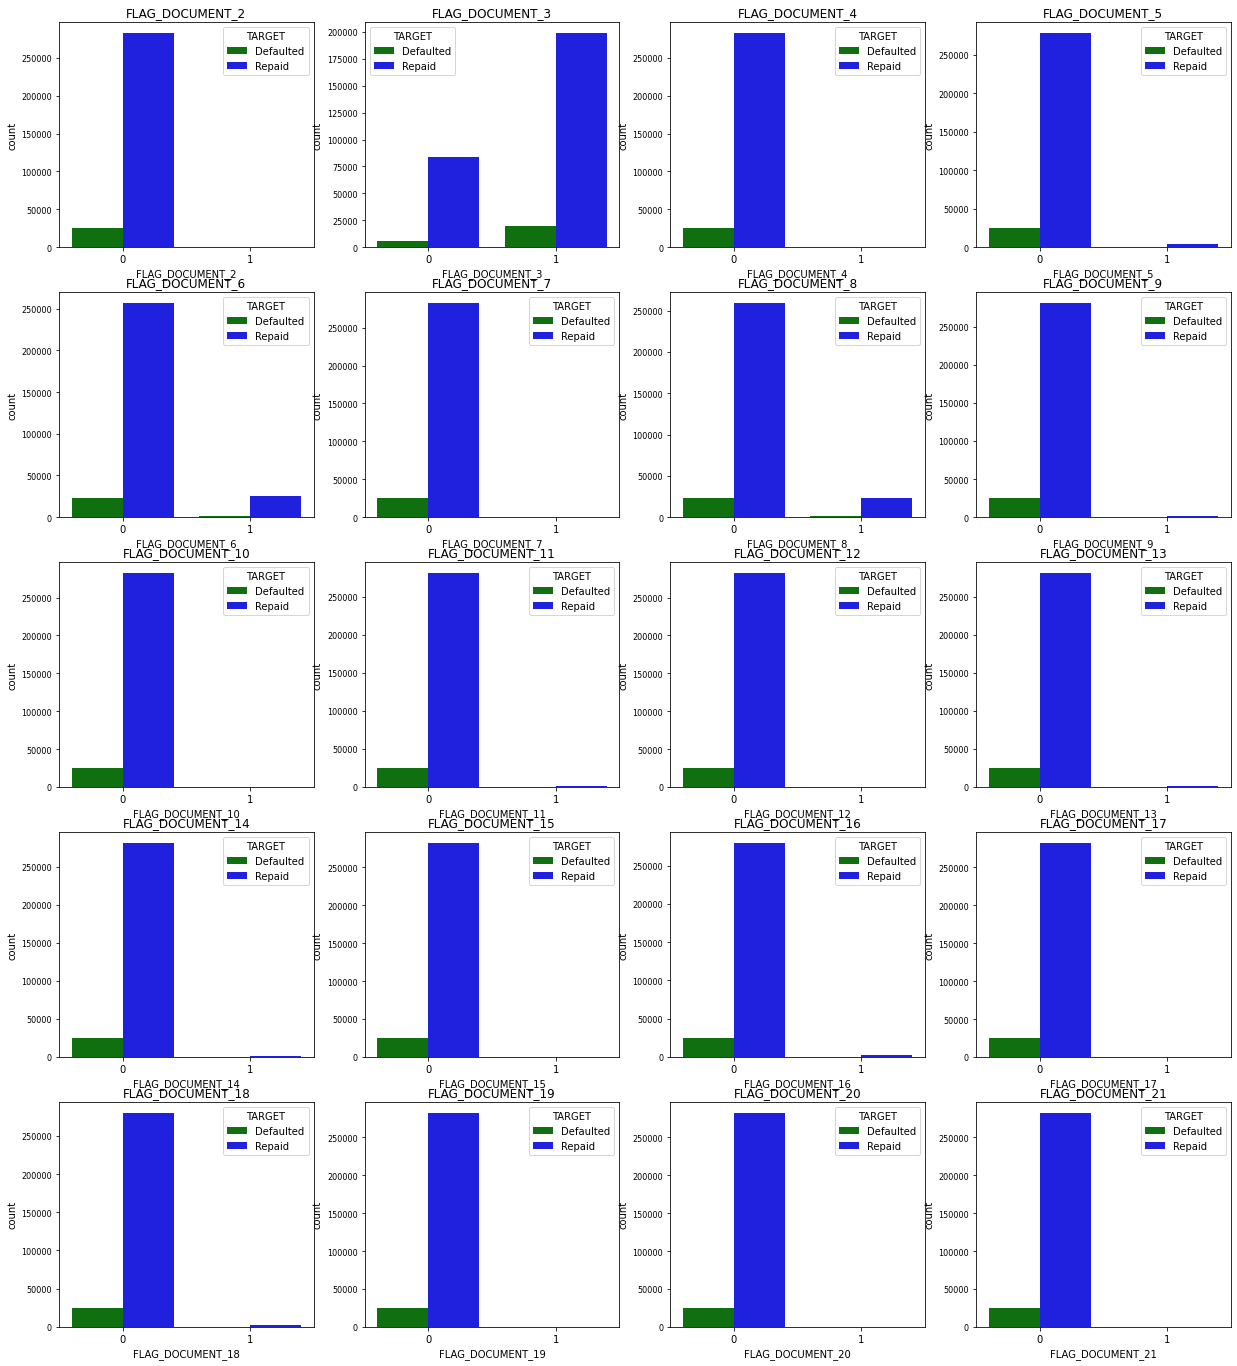

In [50]:
# check if FLAG_DOCUMENT_X has any correlation with loan repayment status
import itertools
flag_docs = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
             'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
             'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
             'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
flag_df = app[flag_docs+["TARGET"]]

num_flag_docs = len(flag_docs)

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulted",0:"Repaid"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_docs,range(num_flag_docs)): 
    #itertools are Functions creating iterators for efficient looping
    #zip_longest for combined two iterables
    
    plt.subplot(5,4,j+1)
    ax = sns.countplot(flag_df[i],hue=flag_df["TARGET"],palette=["g","b"])
    plt.yticks(fontsize=8)
    plt.title(i)

The above graph shows that almost all people who applied for loans did not submit FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. It also shows that there is a less chance of defaulting the loan if a borrower submitted FLAG_DOCUMENT_3. Thus, except for FLAG_DOCUMENT_3, we can remove the rest of FLAG_DOCUMENT_X.

#In FLAG_DOCUMENT_3 can see those are repaid there are less amount document submit but in defaulted case there are  many of the customers submitted the FLAG_DOCUMENT_3.

In [51]:
# include the flag documents in remove_col_appl
flag_docs = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
             'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
             'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
             'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
flag_docs.remove('FLAG_DOCUMENT_3') 

#we can use FLAG_DOCUMENTS_3 for analysis others are droped

In [52]:
remove_col_appl = remove_col_app + flag_docs
len(remove_col_appl)

69

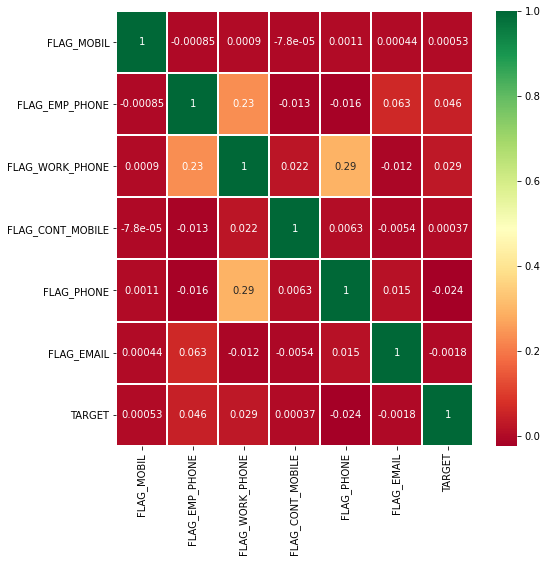

In [53]:
#CONTACT PARAMETER

# check if there is any correlation between mobile phone, work phone, email, and other contacts parameters

contact_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contact_corr = app[contact_cols].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

There is no correlation between flags of mobile phone, email etc with loan repayment; thus, these columns can be removed.

In [54]:
# include the above 6 flag columns to be removed
contact_cols.remove('TARGET') 
remove_col_appl = remove_col_appl + contact_cols
len(remove_col_appl)

75

In [55]:
# Now drop the unwanted columns from application_data
app.drop(labels=remove_col_appl,axis=1,inplace=True)

In [56]:
# inspect the dataframe after removal of unwanted columns
app.shape

(307511, 47)

In [57]:
# inspect the column types after removal of unwanted columns
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

4. Analyze and Remove Unnecessary Columns in prev_application

In [58]:
# more than or equal to 40% empty rows columns in prev_application
remove_col_prev = null_40_prev["Column Name"].tolist()
remove_col_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [30]:
# add other columns which are not needed
#added  more columns for remove there is no need of this columns to analysis.
remove_col_prev = remove_col_prev + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
len(remove_col_prev)

13

In [59]:
# drop unwanted columns from prev_application
prev.drop(labels=remove_col_prev,axis=1,inplace=True)

In [60]:
# inspect the dataframe after removal of unwanted columns
prev.shape

(1670214, 26)

In [61]:
# inspect column types after removal of unwanted columns
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

5. Convert numerical values to categorical values in application_data

In [62]:
#conert columns negative to positive.
''''Convert DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, 
DAYS_ID_PUBLISH from negative to positive as days cannot be negative.'''

days_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in days_cols:
    app[col] = abs(app[col])


In [63]:
#Calculate AGE and create categorical bins

# Get the max AGE
print(app['DAYS_BIRTH'].max())

25229


In [64]:
# create bins for AGE
app['AGE'] = app['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

app['AGE_GROUP']=pd.cut(app['AGE'],bins=bins,labels=slots)
#pd.cut is used to create Bin values into discrete intervals.

In [67]:
# check the binning of data and % of data in each category
app['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

31% loan applicants have age above 50 years.

More than 55% of loan applicants have age over 40 years

In [68]:
# create bins for YEARS EMPLOYED
app['YEARS_EMPLOYED'] = app['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app['EMPLOYMENT_YEAR']=pd.cut(app['YEARS_EMPLOYED'],bins=bins,labels=slots)

# check the binning of data and % of data in each category
app['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

More than 55% of the loan applicants have 0-5 years work experience and

almost 80% of them have less than 10 years work experience.

In [69]:
# bin numerical columns to create categorical columns

# create bins for income
app['AMT_INCOME_TOTAL']=app['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=slot)

# check the binning of data and % of data in each category
app['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

More than 50% loan applicants have income 100K-200K. 

Almost 7% loan applicants have income in between  300K to 1M.

In [70]:
# create bins for credit amount
app['AMT_CREDIT']=app['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app['AMT_CREDIT_RANGE']=pd.cut(app['AMT_CREDIT'],bins=bins,labels=slots)

# check the binning of data and % of data in each category
app['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

More Than 16% loan applicants have taken loan above 1M 

and very less than between 0 to 100k.



In [71]:
# inspect column types 
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [72]:
# convert object and numerical data types to category data type
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                       'LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
                       'WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY']

for col in categorical_columns:
    app[col] =pd.Categorical(app[col])
    
    #convert object to category beacause;  Categorical type is better for memory optimization.

# get the information
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

6. Convert numerical values to categorical values in prev_application

In [73]:
# convert negative days to positive days 
prev['DAYS_DECISION'] = abs(prev['DAYS_DECISION'])

#age group calculation e.g. 388 will be grouped as 300-400
prev['DAYS_DECISION_GROUP'] = (
    prev['DAYS_DECISION']-(prev['DAYS_DECISION'] % 400)).astype(str)+'-'+ (
    prev['DAYS_DECISION']-(prev['DAYS_DECISION'] % 400) + 400).astype(str)

prev['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

About 37% loan applicants have applied for a new loan within 0-400 days of previous loan decision

In [74]:
# inspect column types after conversion
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [75]:
# convert object and numerical data types to category data type
cat_col_prev = ['NAME_CASH_LOAN_PURPOSE','FLAG_LAST_APPL_PER_CONTRACT','NAME_CONTRACT_STATUS',
                'NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                'NAME_YIELD_GROUP','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in cat_col_prev:
    prev[col] =pd.Categorical(prev[col])

In [76]:
# inspect column types after conversion
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1284699 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

7. Impute missing values in application_data

In [77]:
# check % null value of each column in application_data
round(app.isnull().sum() / len(app)* 100,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EMPLOYMENT_YEAR                27.08
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_INCOME_RANGE                0.08
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
AMT_ANNUITY                     0.00
NAME_HOUSING_TYPE               0.00
NAME_INCOME_TYPE                0.00
REGION_POPULATION_RELATIVE      0.00
AMT_CREDIT_RANGE                0.00
AMT_CREDIT                      0.00
AMT_INCOME_TOTAL                0.00
CNT_CHILDREN                    0.00
DAYS_EMPLOYED                   0.00
F

'''OCCUPATION_TYPE'''

Impute categorical variable 'OCCUPATION_TYPE', which has high null percentage(31.35%),and make new category 'UNKNOWN'.

In [78]:
app['OCCUPATION_TYPE'] = app['OCCUPATION_TYPE'].cat.add_categories('Unknown')
app['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 
app['OCCUPATION_TYPE']

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507        Unknown
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: category
Categories (19, object): ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', ..., 'Secretaries', 'Security staff', 'Waiters/barmen staff', 'Unknown']

In [79]:
app['EMPLOYMENT_YEAR'].value_counts()

0-5         124634
5-10         55983
10-20        32658
20-30         8409
30-40         2374
40-50          175
60 above         0
50-60            0
Name: EMPLOYMENT_YEAR, dtype: int64

'''EMPLOYMENT_YEAR'''

Impute categorical variable 'EMPLOYMENT_YEAR', which has high null percentage(27.08%),

with a new category as assigning it to any existing category might influence the analysis.

In [80]:
app['EMPLOYMENT_YEAR'] = app['EMPLOYMENT_YEAR'].cat.add_categories('Unknown')
app['EMPLOYMENT_YEAR'].fillna('Unknown', inplace =True) 
app['EMPLOYMENT_YEAR']

0             0-5
1             0-5
2         Unknown
3            5-10
4            5-10
           ...   
307506    Unknown
307507    Unknown
307508      20-30
307509      10-20
307510        0-5
Name: EMPLOYMENT_YEAR, Length: 307511, dtype: category
Categories (9, object): ['0-5' < '5-10' < '10-20' < '20-30' ... '40-50' < '50-60' < '60 above' < 'Unknown']

In [81]:
app['EMPLOYMENT_YEAR'].value_counts()

0-5         124634
Unknown      83278
5-10         55983
10-20        32658
20-30         8409
30-40         2374
40-50          175
60 above         0
50-60            0
Name: EMPLOYMENT_YEAR, dtype: int64

AMT_REQ_CREDIT_BUREAU_X

In [82]:
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Impute numerical variables with the median as there are outliers that can be seen from results of describe().

In [83]:
num_enquiries = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in num_enquiries:
    app[col].fillna(app[col].median(),inplace = True)

NAME_TYPE_SUITE

In [84]:
app['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

NAME_TYPE_SUITE has low null percentage(0.42%) - impute with the most frequent value

In [85]:
app['NAME_TYPE_SUITE'].fillna((app['NAME_TYPE_SUITE'].mode()),inplace = True)

We still have few null values in the columns  We will ignore as the percentages are very small.

8. Impute missing values in prev_application

In [92]:
# check % null value of each column in previous_data
round(prev.isnull().sum() / prev.shape[0] * 100,2).sort_values(ascending=False)

AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
DAYS_DECISION_GROUP             0.00
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_YIELD_GROUP                0.00
SK_ID_PREV                      0.00
d

In [99]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,1.000000e+01,1.000000e+00,2.800000e+02,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01


AMT_GOODS_PRICE

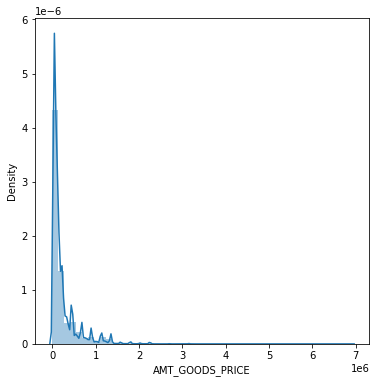

In [93]:
plt.figure(figsize=(6,6))
sns.distplot(prev['AMT_GOODS_PRICE'])
plt.show()

There is a peak at the left side of the distribution; it also indicates the presence of outliers. Imputing with mean would not be the right approach; we will impute with median.

In [94]:
prev['AMT_GOODS_PRICE'].fillna(prev['AMT_GOODS_PRICE'].median(), inplace=True)

AMT_ANNUITY

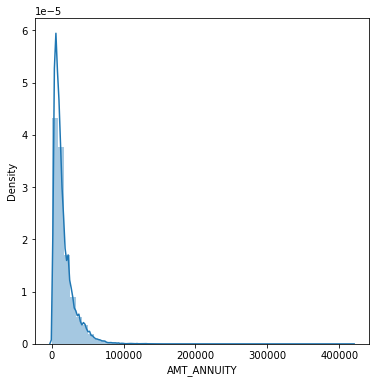

In [95]:
plt.figure(figsize=(6,6))
sns.distplot(prev['AMT_ANNUITY'])
plt.show()

There is a peak at the left side of the distribution; it also indicates the presence of outliers. Imputing with mean would not be the right approach; we will impute with median.

In [96]:
prev['AMT_ANNUITY'].fillna(prev['AMT_ANNUITY'].median(),inplace = True)

CNT_PAYMENT

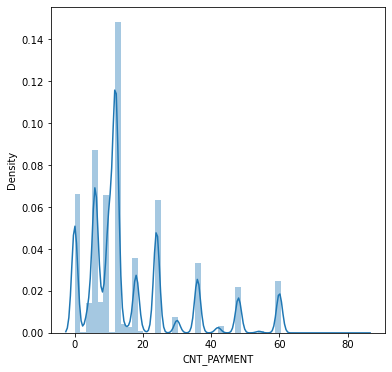

In [98]:
plt.figure(figsize=(6,6))
sns.distplot(prev['CNT_PAYMENT'])
plt.show()

In [97]:
prev['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.0         3
44.0         2
39.0         2
38.0         2
46.0         2
40.0         1
33.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [100]:
prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [101]:
prev.loc[prev['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

Impute CNT_PAYMENT with 0 since the NAME_CONTRACT_STATUS for these rows indicate that most of these loans were not started.

In [102]:
prev['CNT_PAYMENT'].fillna(0,inplace = True)

We still have a few null values in the PRODUCT_COMBINATION column. We will ignore this since the missing percentage is very small.

9.  Identifying the outliers in application_data

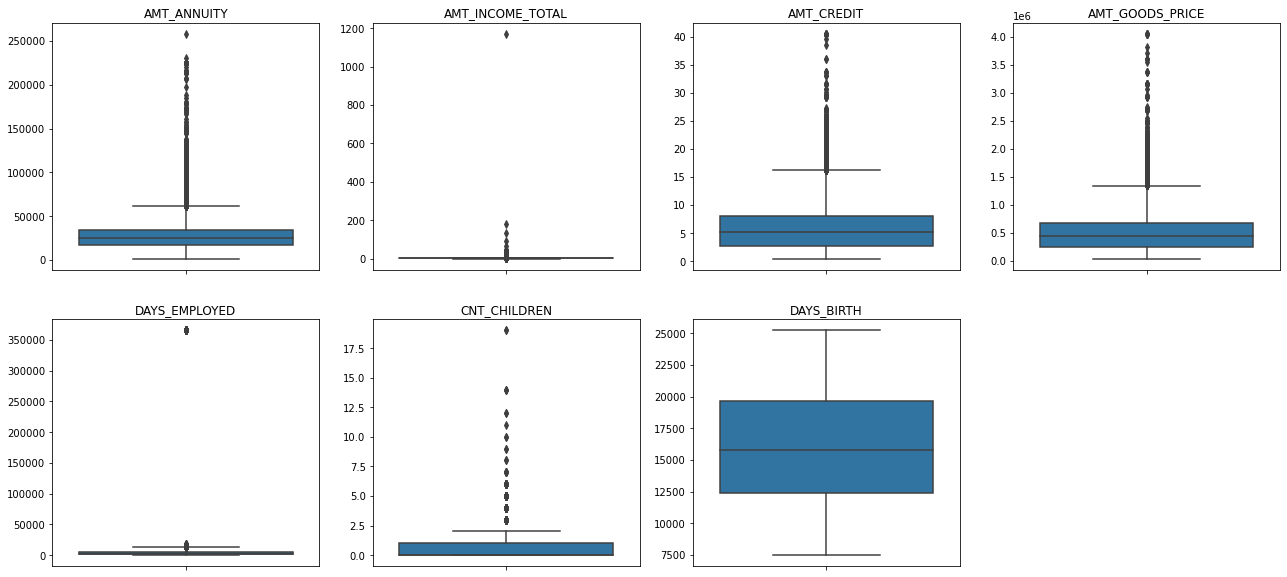

In [103]:
plt.figure(figsize=(22,10))

outlier = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED',
                     'CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#we remove outliers at the time of apply machine learning algorithm.

From graph above, we can see that in application_data:

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

AMT_INCOME_TOTAL has outlier values that indicate that a few of the loan applicants have high income compared to the others.

DAYS_BIRTH has no outlier, which means that the data available is reliable.

DAYS_EMPLOYED has outlier values around 350000(days), which translates to ~958 years which is impossible and hence this has to be incorrect entries.

In [105]:
app[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
                  'CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


10. Identifying the outliers in prev_application

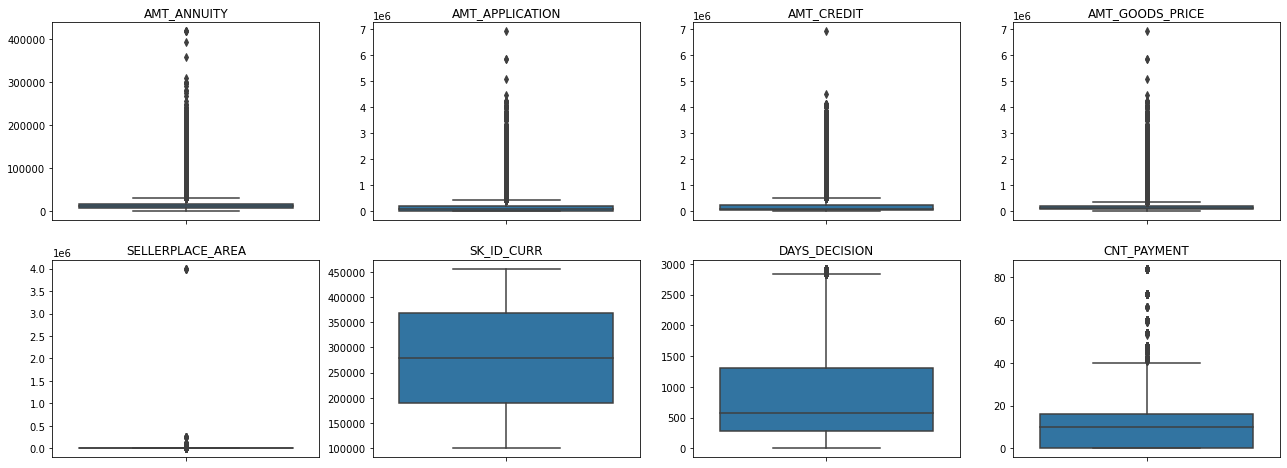

In [66]:
plt.figure(figsize=(22,8))

prev_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA',
                     'SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(prev_outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev[i[1]])
    plt.title(i[1])
    plt.ylabel("")


From graph above, we can see that in prev_application:

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have a huge number of outliers.

CNT_PAYMENT has a few outliers.

SK_ID_CURR is an ID column and hence, no outlier.

DAYS_DECISION has a very small number of outliers, indicating that these previous applications decisions were taken a long time ago.

In [67]:
prev[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA',
                  'CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


DATA ANALYSIS

In [106]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT

CHECK TARGET VARIABLE IS BALANCED OR NOT.

In [107]:
app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [108]:
100*app['TARGET'].value_counts()/len(app['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

from above data is totally imballanced, ratio = 91.92.

8% customers have payment difficulties.

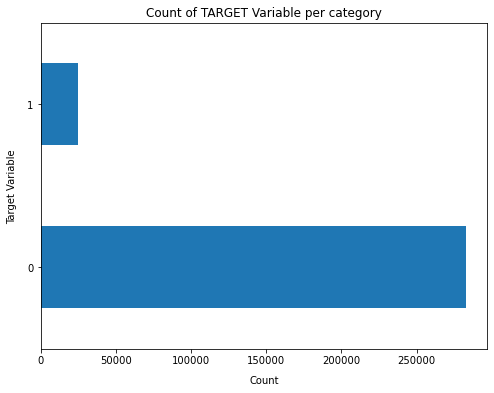

In [109]:
app['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.title("Count of TARGET Variable per category");

DEFINE THE FUNTION FOR UNIVARIATE ANALYSIS

In [154]:
def univariate_categorical(column,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app[column].value_counts()
    df1 = pd.DataFrame({column: temp.index})

    # Calculate the percentage of target=1 per category value
    cat_percent = app[[column, 'TARGET']].groupby([column],as_index=False).mean()
    cat_percent["TARGET"] = cat_percent["TARGET"]*100
    cat_percent.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = column, 
                    data=app,
                    hue ="TARGET",
                    order=cat_percent[column],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(column, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['OTHER CASES','DIFF. WITH PAYMENT'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = column, 
                    y='TARGET', 
                    order=cat_percent[column], 
                    data=cat_percent,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(column + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show()

UNIVARIATE ANALYSIS

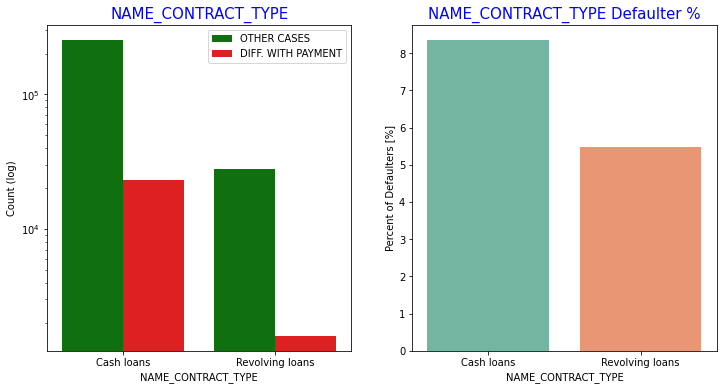

In [155]:
# check the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

Revolving loans are just a small fraction (10%) of Cash loans; however, a larger amount of Revolving loans has difficulties with payment.

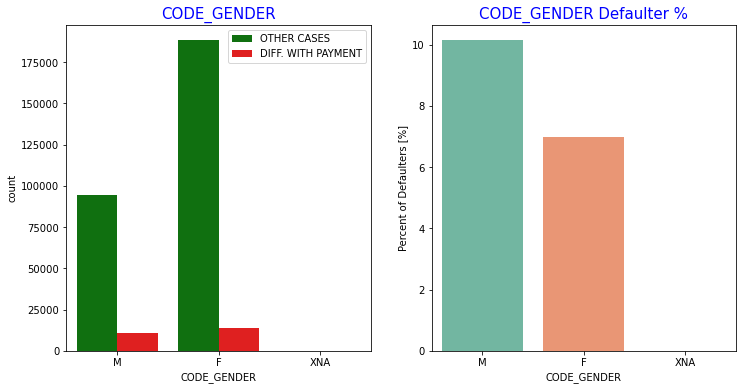

In [76]:
# check the type of Gender vs. loan repayment status
univariate_categorical('CODE_GENDER')

The number of female clients is almost double the number of male clients; however, males have higher chance of defaulting.

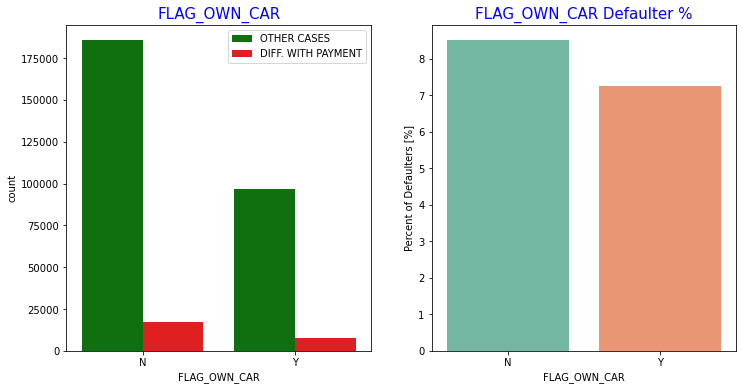

In [77]:
# check if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

Clients who do not own a car are twice the number of clients who own a car. The default percentage for both cases is almost the same. There is no correlation between owning a car and loan repayment.

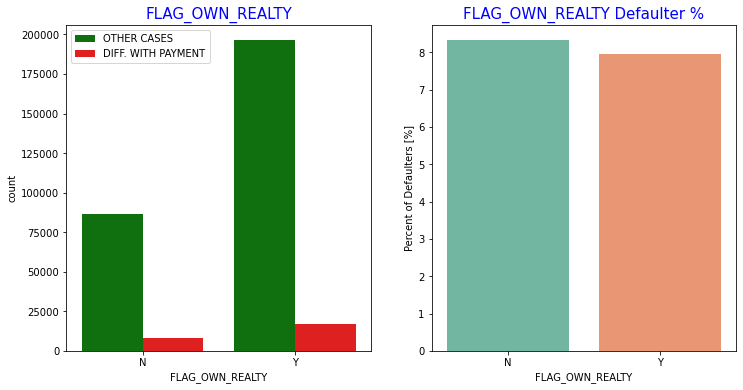

In [78]:
# check if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

Clients who own a realty are more than double the number of clients who do not own a realty. The default percentage for both cases is almost the same. There is no correlation between owning a realty and loan repayment.

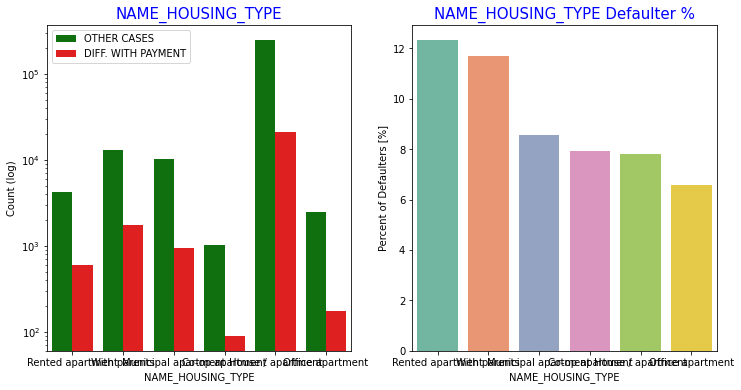

In [80]:
# analyze Housing Type vs. loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True)

Majority of the clients live in House/apartment

Clients living in office apartments have lowest default rate

Clients living in rented apartments and people living with parents have higher default rate

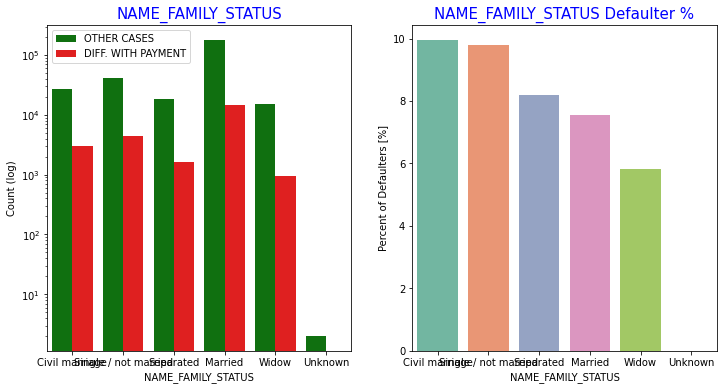

In [89]:
# analyze Family Status vs. loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",True)

Most of the clients are married, followed by Single/not married and civil marriage
In terms of percentage of not repayment of loan,
Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

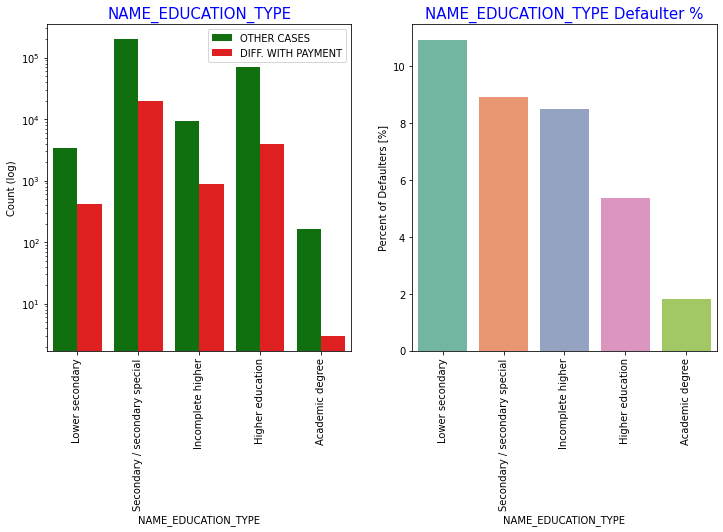

In [92]:
# analyze Education Type vs. loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree

The Lower secondary category, although quite rare, has the largest rate of defaulting the loan (~11%). Clients with Academic degree have less than 2% defaulting rate.

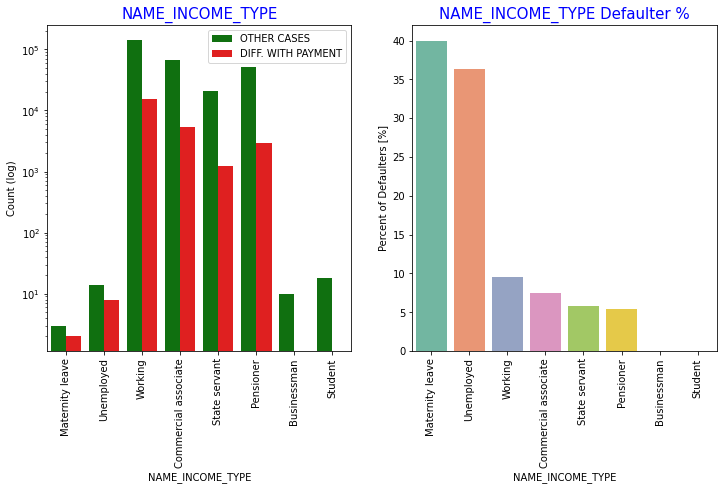

In [97]:
# analyze Income Type vs. loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True)

Most of the clients have income type as Working, followed by Commercial associate, Pensioner and State servant.

Clients with type of income Maternity leave have almost 40% defaulting rate, followed by Unemployed (~37%). The remaining types of incomes are under 10% defaulting rate.

Student and Businessmen, which have less in numbers, do not have any default record. Thus, these two categories are the safest for providing loan.

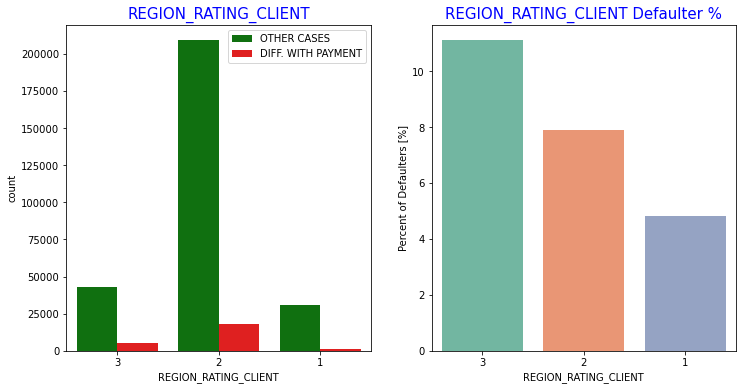

In [98]:
# analyze Region Rating where clients live vs. loan repayment status
univariate_categorical("REGION_RATING_CLIENT")

Most of the clients are living in Region_Rating 2 place.

Region Rating 3 has the highest default rate (~11%)

Region_Rating 1, where the least number of clients live, has the lowest probability of defaulting, thus safer for approving loans

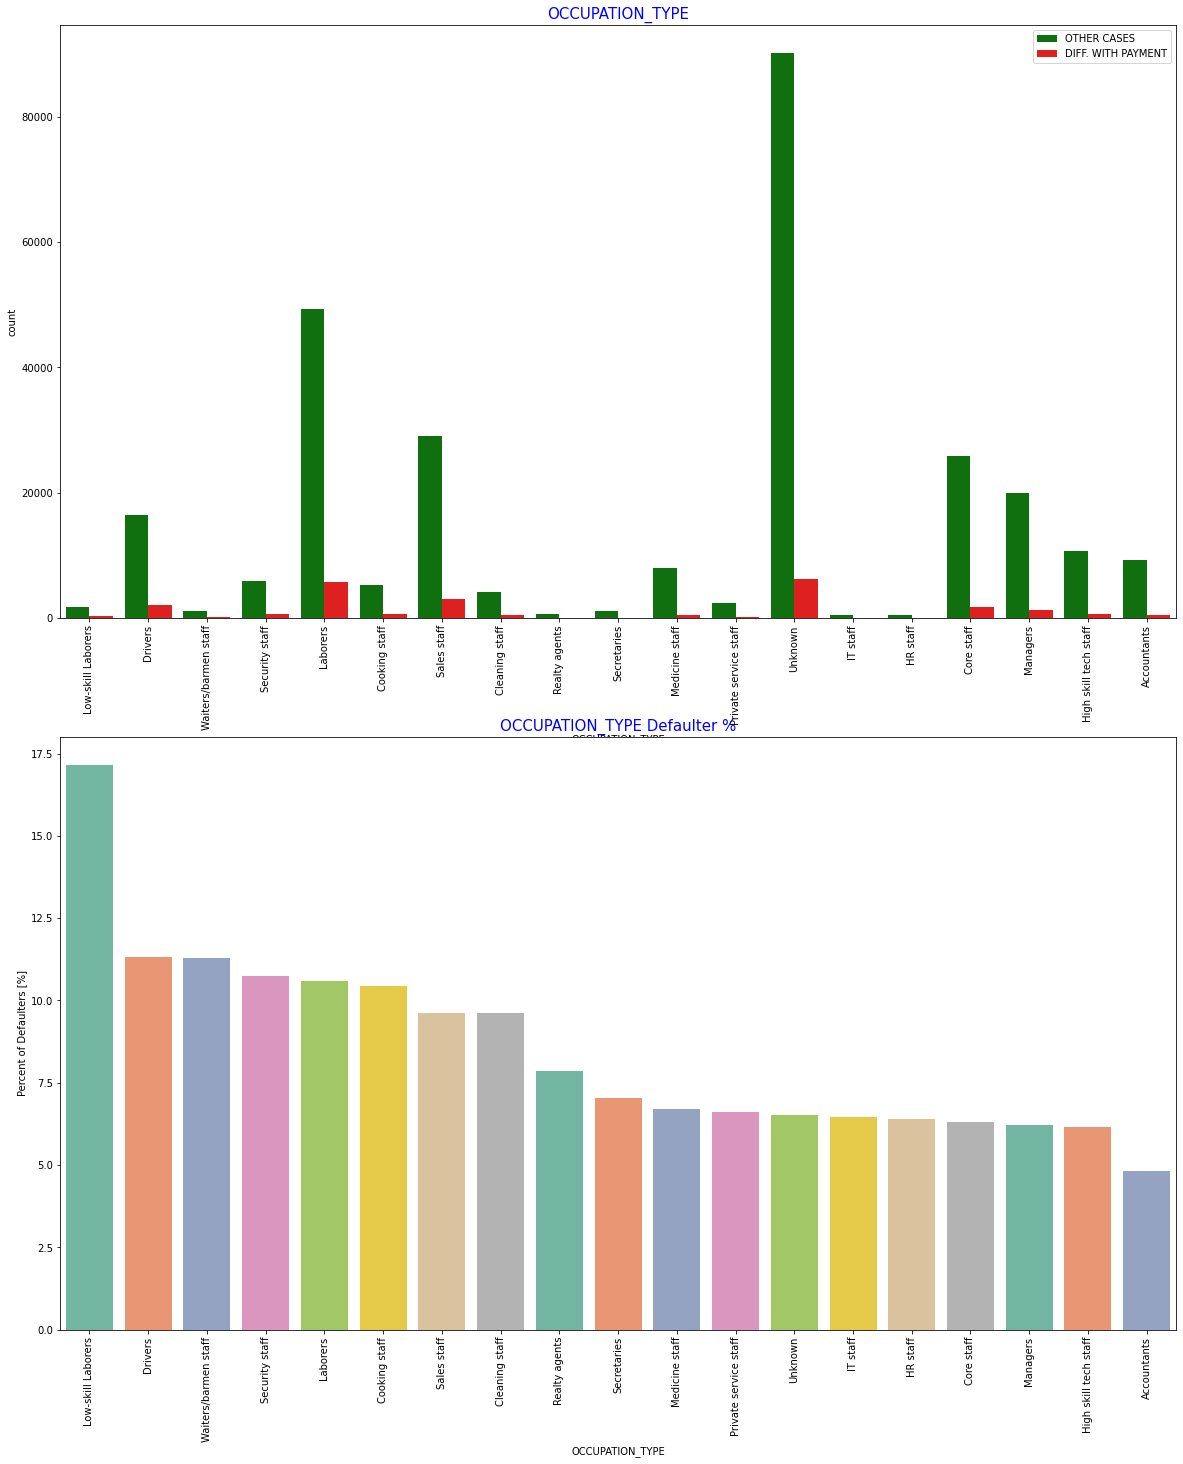

In [105]:
# analyze Occupation Type vs loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

Most of the loans were taken by Laborers, followed by Sales staff. IT staff took the lowest amount of loans.

The category with the highest percent of defaults are Low-skill Laborers (~17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

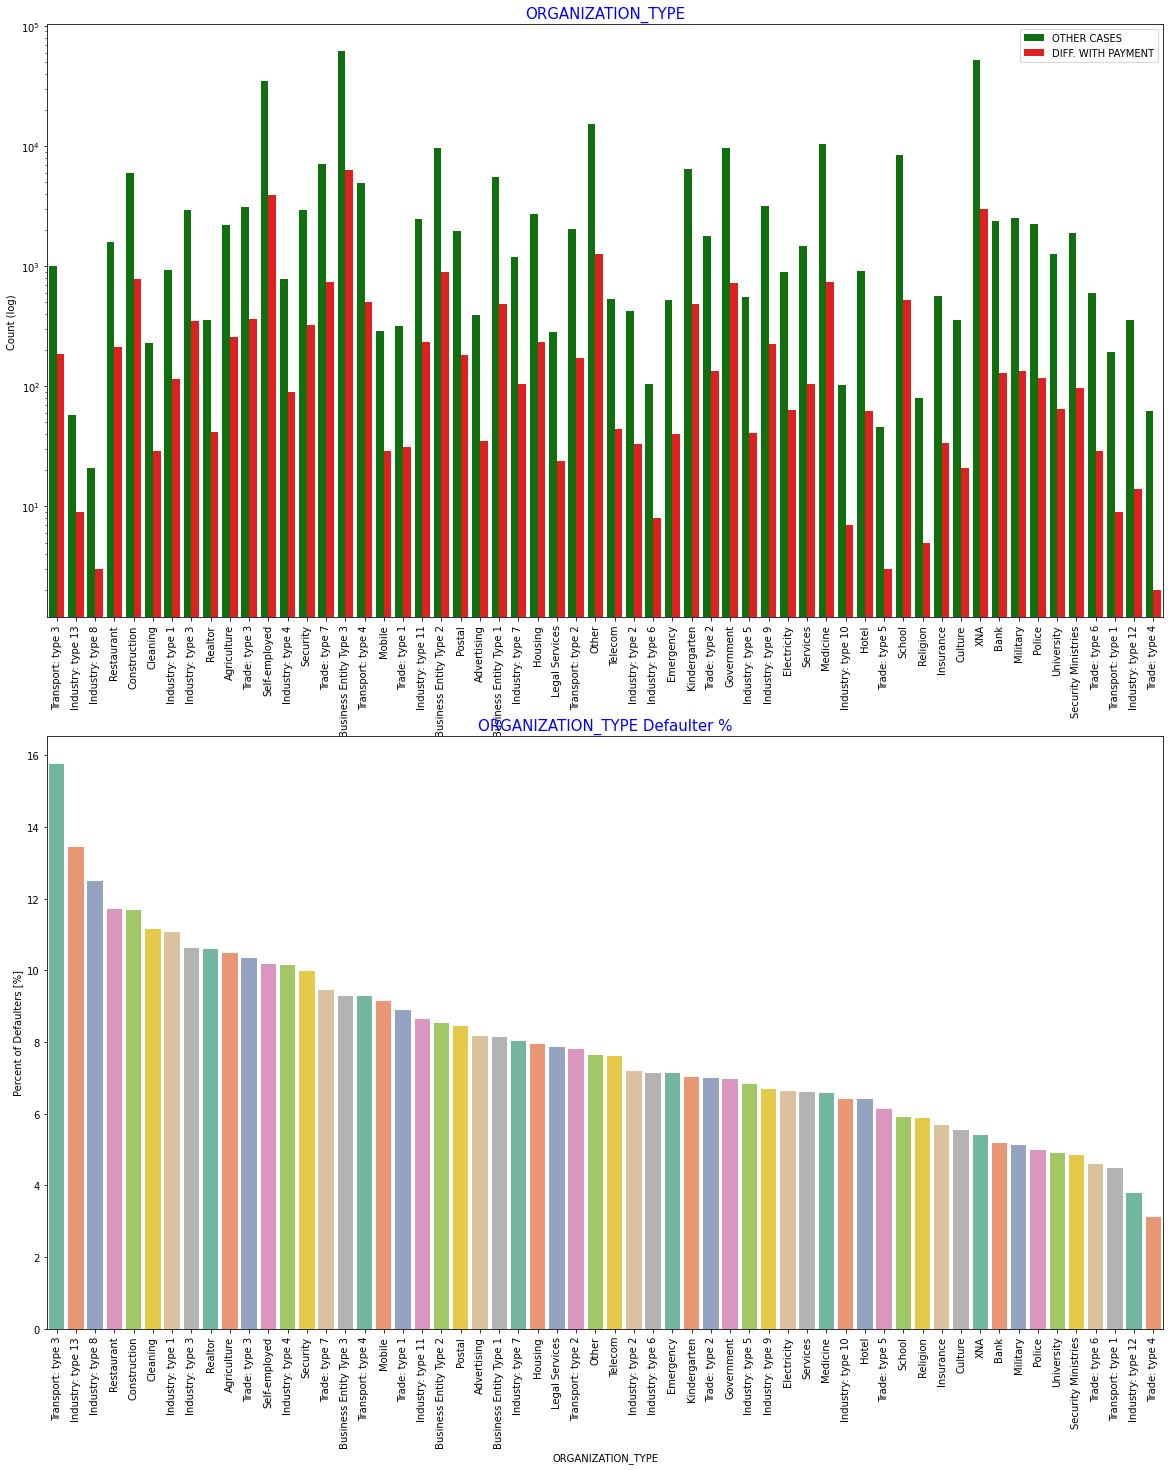

In [106]:
# check Organization type vs. Loan repayment status
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

Organizations with highest default rate are Transport: type 3 (~16%),

Industry: type 13 (~13.5%), 

Industry: type 8 (~12.5%) and Restaurant (less than 12%).

Most of the clients are from Business Entity Type 3
Organization type information is unavailable(XNA) for a very high number of applications.

From the graphs, we can see that the following categories of organization type have lesser default rate, thus, safer for providing loans:

Trade Type 4

Industry type 12

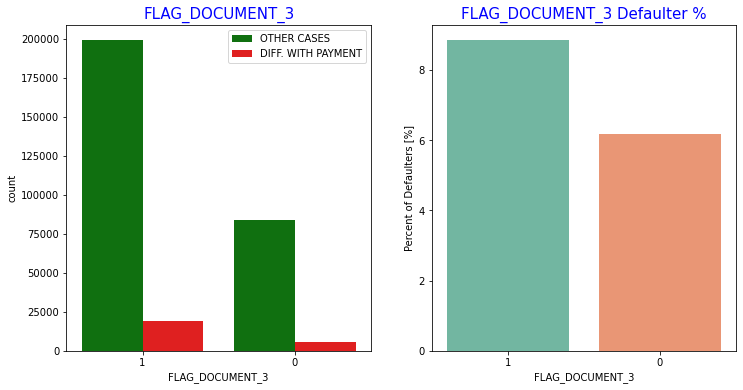

In [107]:
# analyze Flag_Doc_3 submission status vs. Loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)


There is no more significant correlation between payers on time and defaulters in terms of submitting document 3. As we can see from the graphs, even if applicants have submitted the document, they defaulted a slightly more (~9%)

than who have not submitted the document (~6%)

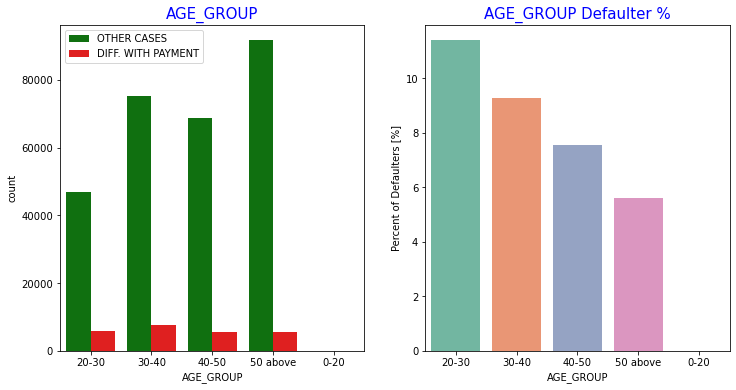

In [108]:
# analyze Age Group vs. loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

Clients age 20-40 have higher probability of defaulting

Clients above age of 50 have low probability of defaulting

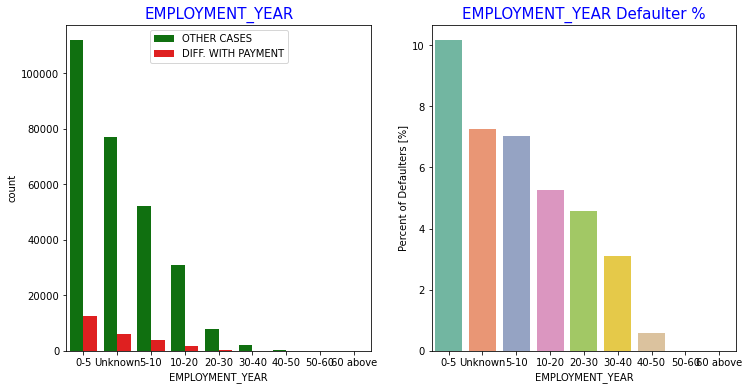

In [109]:
# analyze Employment_Year vs. Loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

Majority of the clients have been employeed 0-5 years. 

The defaulting rates of this group is also the highest (~10%)
With the increasing of employment year, the defaulting rate is also gradually decreasing - with people having 40+ year employment year having less than 1% default rate

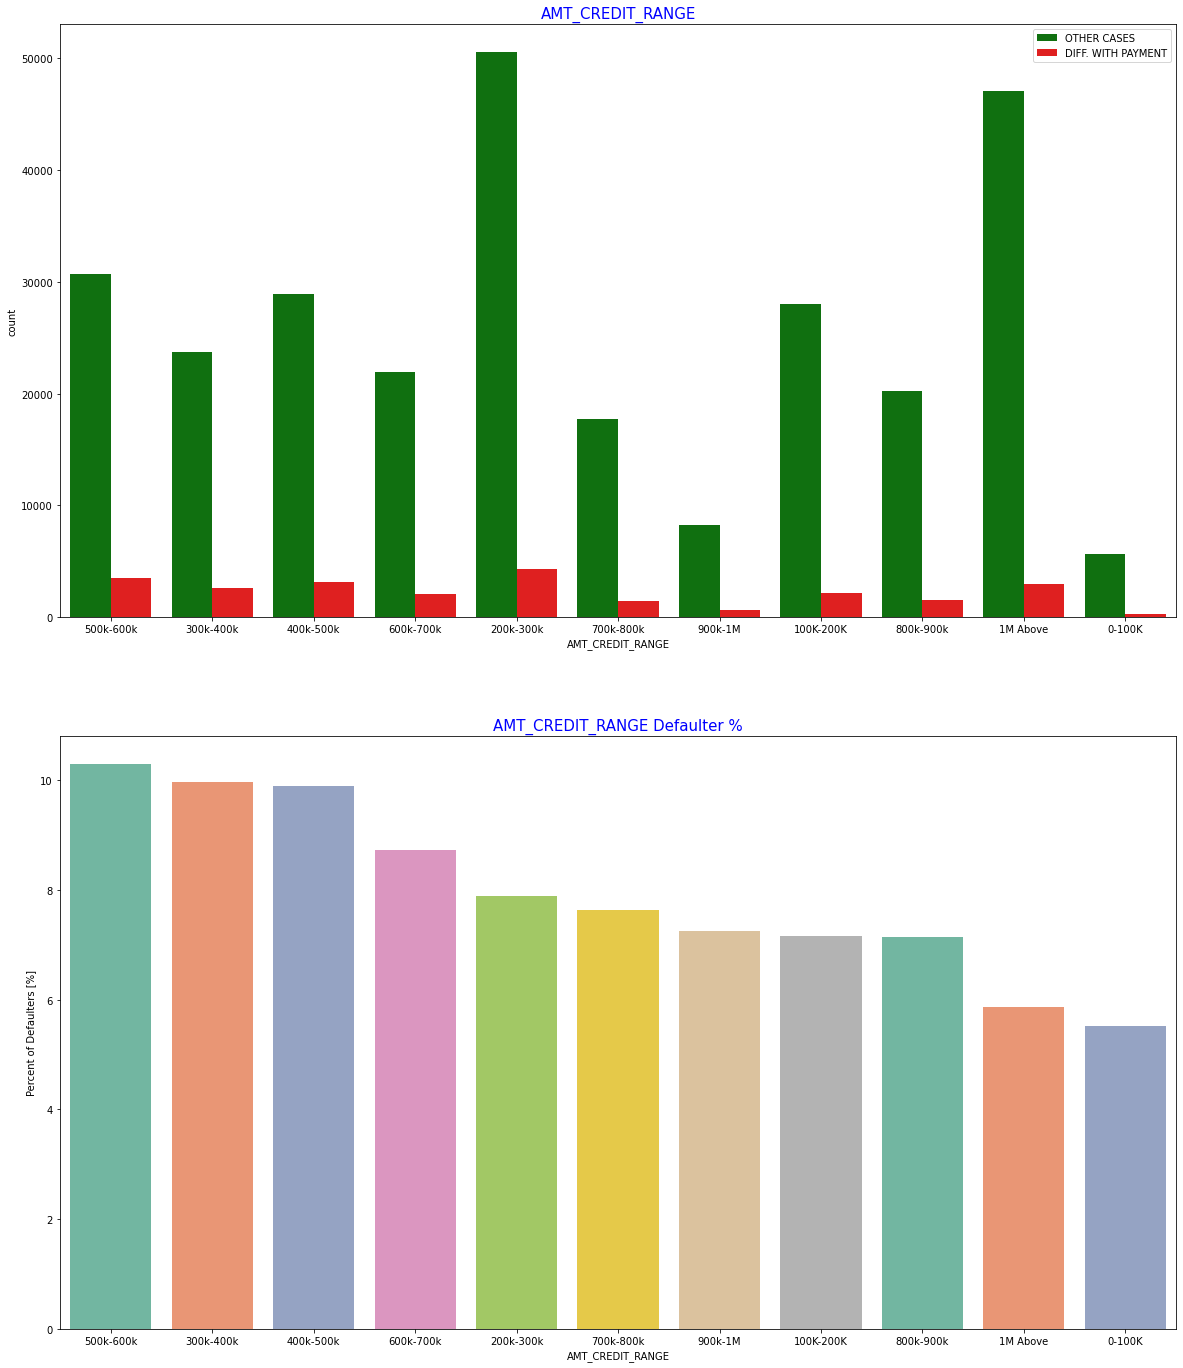

In [110]:
# analyze Amount_Credit vs. loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

Most of the loans are 200-300k and 1M above.

The least number of loans are 0-100k.

Clients with loans for 300-600k tend to default more than others.

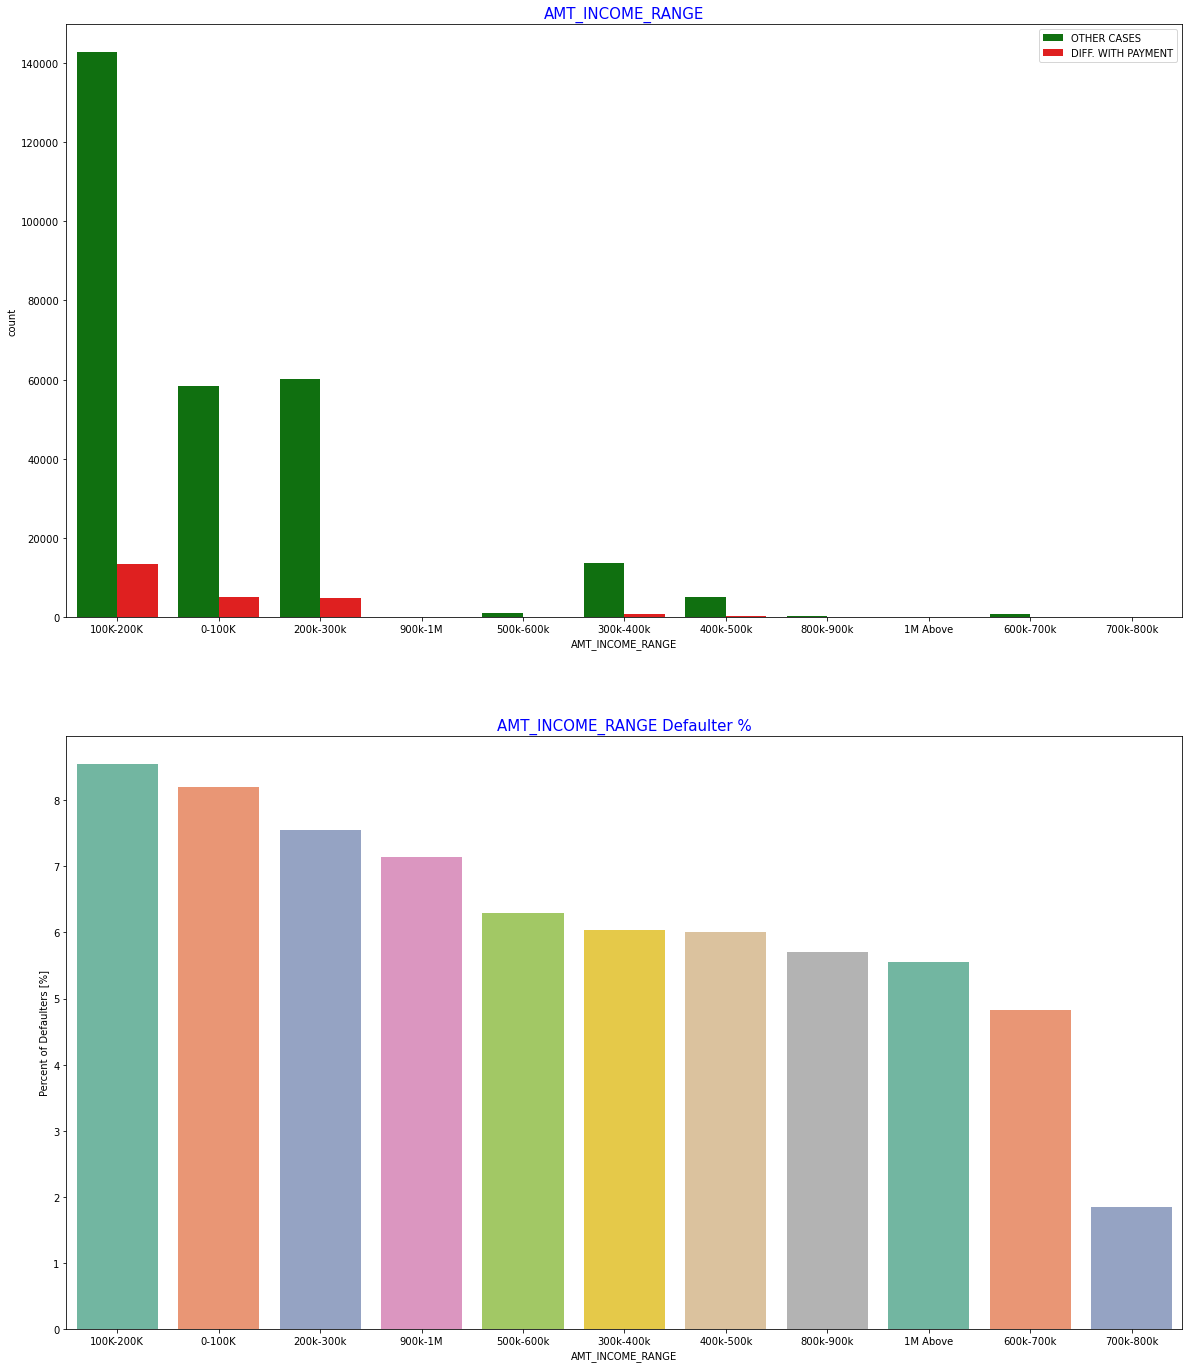

In [111]:
# analyze Income range vs. Loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

~90% of the clients have Income less than 300k

Clients with Income less than 300k have higher default rate

Clients with Income 700-800k are less likely to default.

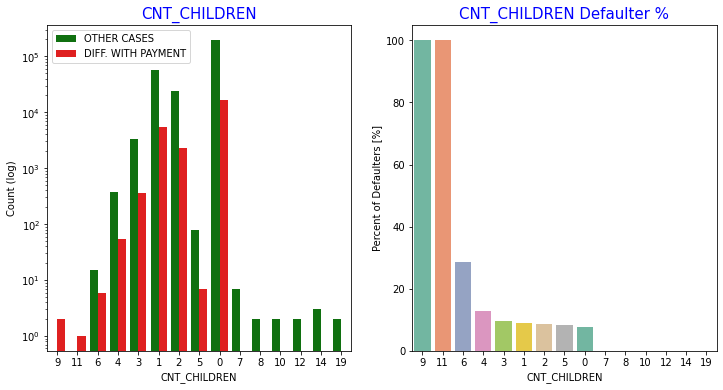

In [112]:
# analyze Number of children vs. Loan repayment status
univariate_categorical("CNT_CHILDREN",True)

Most of the clients do not have children

Very few clients have more than 3 children

Clients who have more than 3 children have a very high default rate, with child count 9 and 11 showing 100% default rate

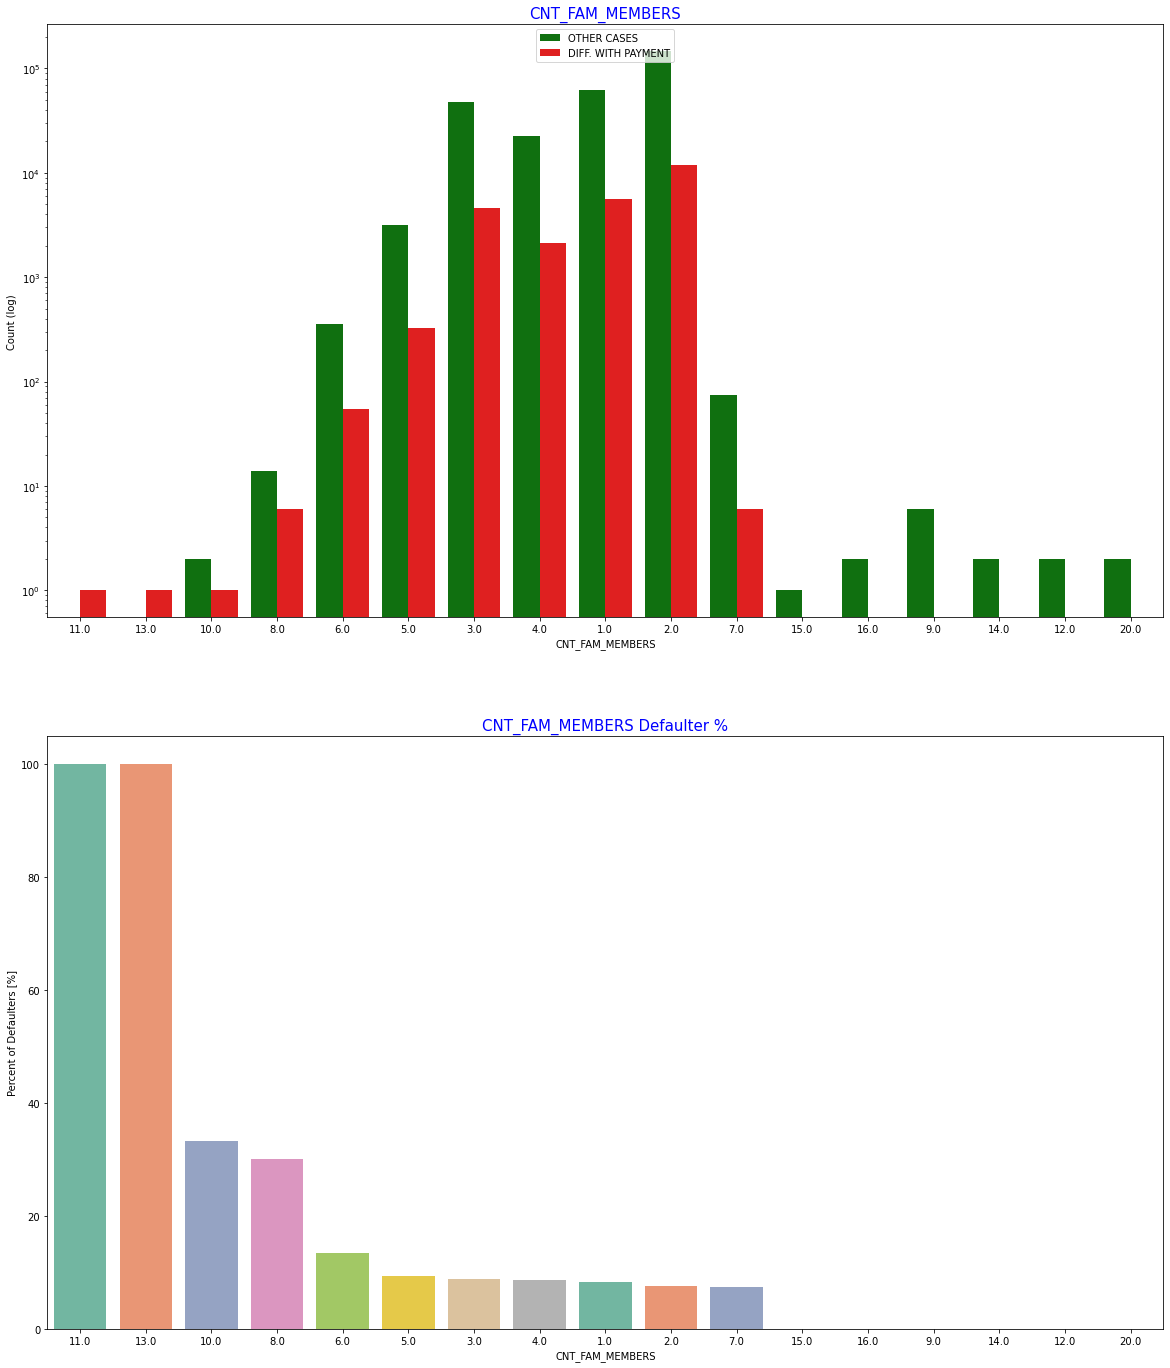

In [113]:
# analyze Number of family members vs. loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)


Family member count follows the same trend as children count, where having more family members increases the risk of defaulting.

CATEGORICAL BI / MULTIVARIATE ANALYSIS

In [135]:
# function for plotting countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=app, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining Labels and Title of the plot using style dictionaries
  
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['no diff with paymnent','Diff with payment'])
    plt.show()

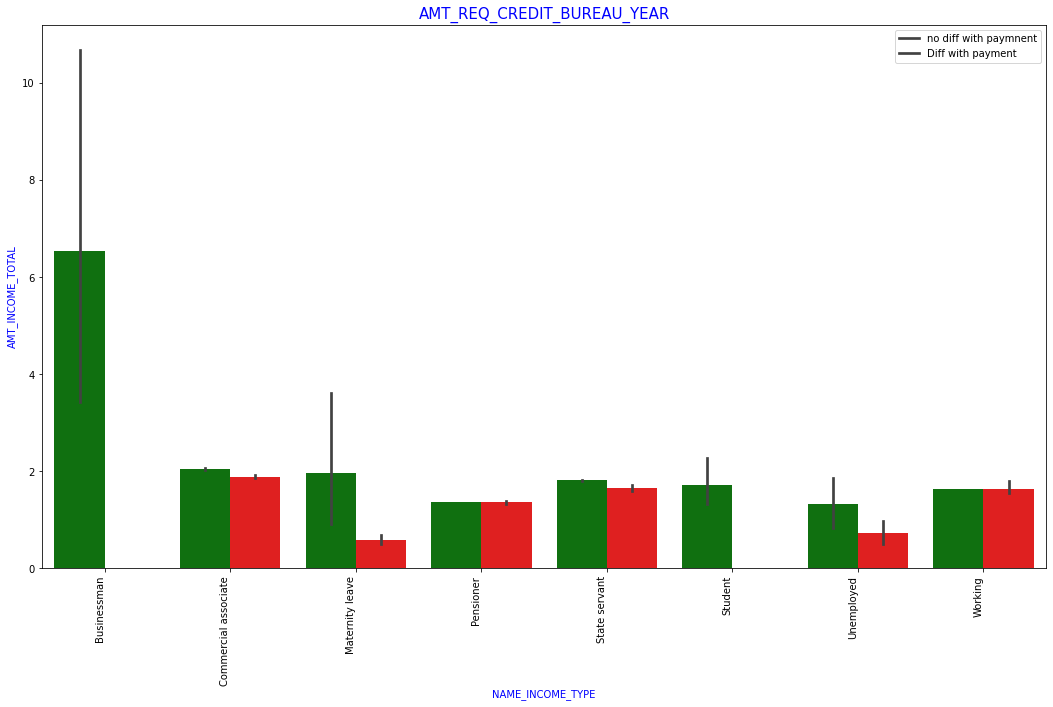

In [136]:
# Income type vs Income Amount
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app,"TARGET",(18,10))

Businessman category and student has the highest income and the highest confidence level of not defaulting.

In [118]:
app.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


In [121]:
app.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,0.001500,0.001369,0.000973,0.000384,-0.002895,0.000350,-0.000283,0.002342,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,-0.003411,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071,0.001467,0.001367
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,-0.078239,-0.047046,-0.041975,-0.051457,0.009308,-0.024166,0.005576,-0.160472,0.009131,0.032248,0.009022,0.031276,0.055218,0.044346,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161,-0.078234,-0.047045
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,-0.330938,-0.241583,-0.183395,0.028019,0.879161,-0.007292,-0.013319,-0.018015,0.015593,-0.001262,0.015232,-0.001861,-0.005865,0.056837,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.034874,-0.330893,-0.241582
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,-0.027261,-0.063835,-0.027805,-0.008506,0.016342,0.036459,0.031191,0.060925,-0.013099,-0.013244,-0.013015,-0.013135,-0.018585,-0.016751,0.001432,0.003481,0.003950,0.026746,0.007924,0.015821,-0.027226,-0.063836
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,-0.064319,-0.009621,0.006575,0.063160,0.052738,0.024010,0.131228,0.000190,-0.021229,0.000239,-0.023767,-0.073701,0.096365,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.036634,0.055408,-0.064319
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,-0.009445,-0.102851,-0.038514,-0.011268,0.075539,0.052269,0.041299,0.125804,-0.011987,-0.022833,-0.011731,-0.024001,-0.063747,0.102843,0.003888,0.002285,0.013503,0.037173,0.010685,-0.008283,-0.009455,-0.102856
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,0.053442,-0.062265,-0.011565,0.009267,0.061185,0.062320,0.026111,0.139367,0.000328,-0.022244,0.000347,-0.024506,-0.076313,0.074900,-0.001749,0.005429,0.001862,0.057313,0.020799,-0.039030,0.053417,-0.062265
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,0.029582,-0.004094,0.053820,0.003993,-0.024209,0.171285,0.002118,0.198924,-0.011160,0.006329,-0.010638,0.002404,-0.044013,-0.084644,-0.002216,0.001160,-0.002335,0.071630,-0.001873,-0.000085,0.029648,-0.004090
DAYS_BIRTH,0.001500,-0.078239,-0.330938,-0.027261,0.055436,-0.009445,0.053442,0.029582,1.000000,0.623941,0.331912,0.272691,-0.278894,-0.091064,-0.065486,0.091996,-0.007425,-0.000206,-0.007023,-0.001925,-0.082939,-0.109666,-0.003581,-0.001018,0.004014,0.003580,0.016281,0.072990,0.999711,0.623941
DAYS_EMPLOYED,0.001369,-0.047046,-0.241583,-0.063835,-0.064319,-0.102851,-0.062265,-0.004094,0.623941,1.000000,0.214573,0.274842,-0.234365,-0.091641,-0.037460,-0.018228,0.005788,0.016460,0.005943,0.013911,0.019159,-0.247870,-0.004485,0.000300,0.002567,-0.031550,0.013521,0.045079,0.623879,1.000000


TOP 10 CORRELATION WITH TARGET VARIABLE

In [128]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_app = app.loc[app['TARGET']==0, cols_for_correlation] # no difficulty with payment
Defaulter_app = app.loc[app['TARGET']==1, cols_for_correlation] # difficulty with payment

In [131]:
# get the top 10 correlation for the Repayers data
corr_repayer = Repayer_app.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_app_repayer = corr_repayer.unstack().reset_index()
corr_app_repayer.columns =['VAR1','VAR2','Correlation']
corr_app_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_app_repayer["Correlation"]=corr_app_repayer["Correlation"].abs() 
corr_app_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_app_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


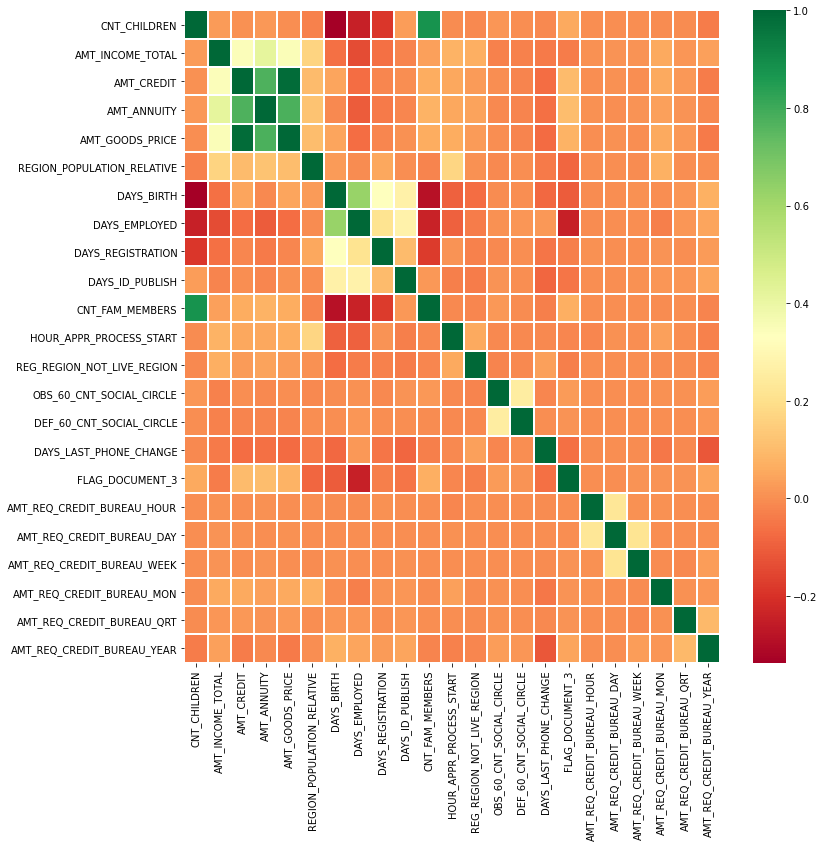

In [132]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

From above graph 

Credit amount is highly correlated with

1. price of the goods for which the loan is given

2. loan annuity

3. total income

There is a severe drop in the correlation between total income and credit amount from defaulters to repayers.

In [139]:
# function for plotting relplot for bivariate numerical analysis on application_data

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=app, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['no diff with payment','diff with payment'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

<Figure size 1080x432 with 0 Axes>

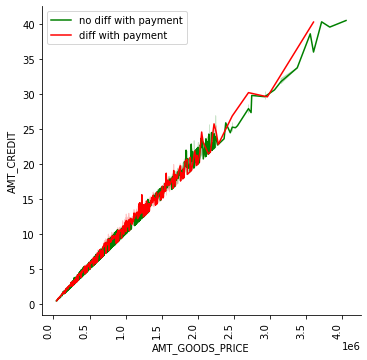

In [140]:
# check the relationship between Goods price and Credit against Loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',app,"TARGET", "line", ['g','r'], False,(15,6))


There appears more defaulters than repayers when the credit amount goes above 2.5M.

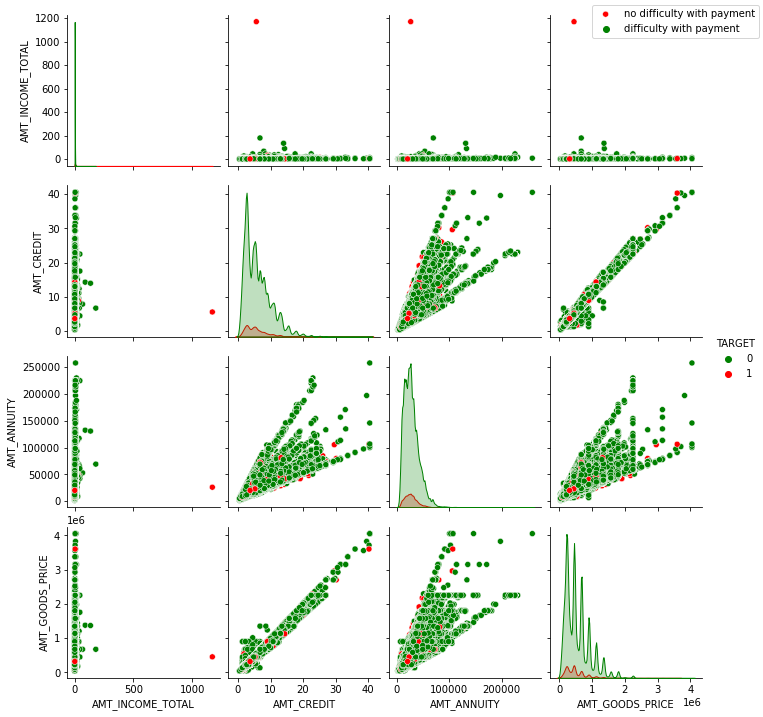

In [143]:
amount = app[['AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['no difficulty with payment','difficulty with payment'])
plt.show()

1. When AMT_ANNUITY >150k and AMT_GOODS_PRICE > 3M, there is a very small chance of defaulting
2. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated - most of the data are consolidated in the form of a line in the scatterplot
3. There are very small defaulters for AMT_CREDIT >2.5M

MERGE BOTH DATAFRAMES

In [145]:
# merge both dataframes with inner join on SK_ID_CURR
merge_app_prev = pd.merge(app, prev, how='inner', on='SK_ID_CURR')
merge_app_prev.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,1,0-5,200k-300k,400k-500k,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,200k-300k,1M Above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,200k-300k,1M Above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,200k-300k,1M Above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50 above,0,Unknown,0-100K,100K-200K,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobi

In [146]:
merge_app_prev.shape

(1413701, 77)

In [147]:
merge_app_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 77 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [148]:
merge_app_prev.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,1.198433e+01,1.207327e-02,5.114275e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,2.006552e+05,9.964321e-01,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,3.232181e+00,1.092132e-01,1.911188e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.820189e+05,5.962560e-02,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,1.000000e+01,0.000000e+00,3.890839e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,6.637500e+04,1.000000e+00,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,1.200000e+01,0.000000e+00,5.627679e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,1.123200e+05,1.000000e+00,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,1.400000e+01,0.000000e+00,6.606783e-0

In [154]:
#function for plotting countplot in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=merge_app_prev,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)  

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [155]:
# bivariate application_data based on Target value 0 and 1 for correlation and other analysis

L0 = merge_app_prev[merge_app_prev['TARGET']==0] # Repayers
L1 = merge_app_prev[merge_app_prev['TARGET']==1] # Defaulters

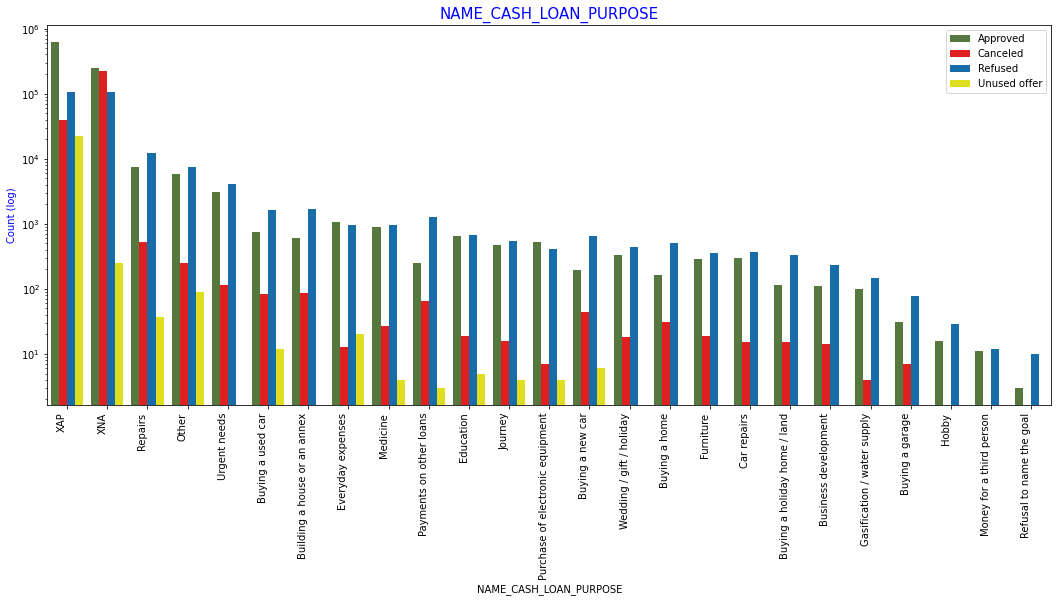

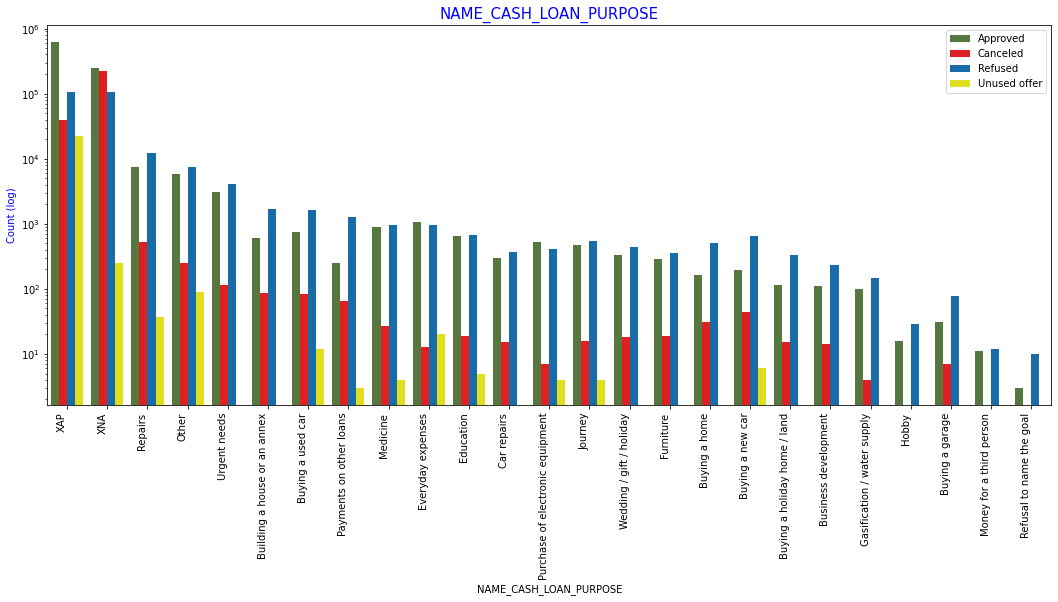

In [156]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

Loan purpose has a very high number of unknown values (XAP, XNA)

Loans taken for the purpose of Repairs have the highest default rate

A high number of applications for the purpose of Repairs and Other have been rejected by the bank or refused by the clients. 

This shows that loan purpose Repair and Other are regarded as high risk by the bank that either the bank rejected or the bank offered very high loan interest rates which were not feasible for the clients, thus they refused the loans.

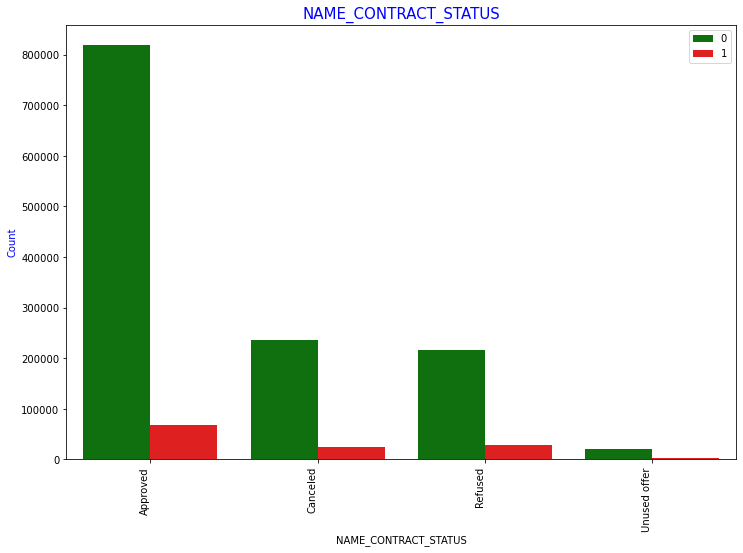

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [157]:
# check the Contract Status vs. Loan repayment status
univariate_merged("NAME_CONTRACT_STATUS",merge_app_prev,"TARGET",['g','r'],False,(12,8))
g = merge_app_prev.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" 
print (df1)

~90% of the clients who previously cancelled have actually been repaying the current loans. Revisiting the interest rates for clients with Canceled contract status would be beneficial.

88% of the clients who were previously refused a loan have been repaying the current loans. The bank should further analyze Refused applications as these category seem to have high probability of repaying the loans.

In [158]:
# Function to plot pointplot on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=merge_app_prev,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

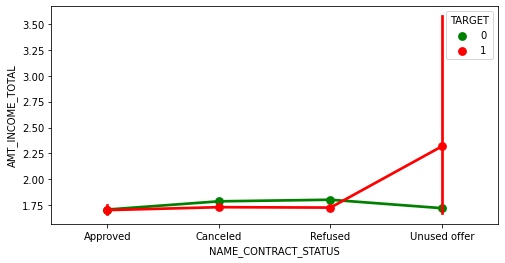

In [159]:
# plot Contract status vs. Income
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')


The point plot shows that the people with previously unused offers and defaulted have average income higher than the others.

CONCLUSIONS :

After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not.

The safest categories to offer loans:

1. NAME_EDUCATION_TYPE: People with Academic degree.
2. NAME_INCOME_TYPE: Students and Businessmen.
3. REGION_RATING_CLIENT: RATING 1.
4. ORGANIZATION_TYPE: People with Trade Type 4 and Industry type 12
5. DAYS_BIRTH: People above age of 50.
6. DAYS_EMPLOYED: People with 40+ year employment.
7. AMT_INCOME_TOTAL:People with Income 700k-800k
8. NAME_CASH_LOAN_PURPOSE: Loans purpose for Hobby, Buying a garage.
9. CNT_CHILDREN: People with 3 or less children.

The riskier categories to offer loans:

1. CODE_GENDER: Men
2. NAME_FAMILY_STATUS : Civil marriage or Single
3. NAME_EDUCATION_TYPE: Lower Secondary or Secondary
4. NAME_INCOME_TYPE: Maternity leave or Unemployed
5. REGION_RATING_CLIENT: Rating 3
6. OCCUPATION_TYPE: Low-skill Laborers (riskiest), Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff
7. ORGANIZATION_TYPE: Transport: type 3 (riskiest), Industry: type 13, Industry: type 8
8. DAYS_BIRTH: age group of 20-40
9. DAYS_EMPLOYED: less than 5 years
10. CNT_CHILDREN & CNT_FAM_MEMBERS: more than 9 children
11. AMT_GOODS_PRICE: above 3M

